In [1]:
import pandas as pd
import numpy as np

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap

In [3]:
import sklearn
from sklearn.model_selection import train_test_split

In [4]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

In [79]:
from sklearn.metrics import confusion_matrix
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from time import time

In [80]:
df = pd.read_csv('./sample_data/enron.csv', index_col=0)
df_outliers = pd.DataFrame()

In [81]:
df.head()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,NaN,4175000.0,phillip.allen@enron.com,-126027.0,-3081055.0,1729541.0,13868.0,47.0,1729541.0,2195.0,152.0,65.0,False,304805.0,1407.0,126027.0,NaN
BADUM JAMES P,NaN,NaN,178980.0,182466.0,NaN,NaN,NaN,NaN,NaN,257817.0,3486.0,NaN,257817.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
BANNANTINE JAMES M,477.0,566.0,NaN,916197.0,NaN,NaN,james.bannantine@enron.com,-560222.0,-5104.0,5243487.0,56301.0,39.0,4046157.0,29.0,864523.0,0.0,False,NaN,465.0,1757552.0,NaN
BAXTER JOHN C,267102.0,NaN,1295738.0,5634343.0,NaN,1200000.0,NaN,NaN,-1386055.0,10623258.0,11200.0,NaN,6680544.0,NaN,2660303.0,NaN,False,1586055.0,NaN,3942714.0,NaN
BAY FRANKLIN R,239671.0,NaN,260455.0,827696.0,NaN,400000.0,frank.bay@enron.com,-82782.0,-201641.0,63014.0,129142.0,NaN,NaN,NaN,69.0,NaN,False,NaN,NaN,145796.0,NaN


## Data Exploration

In [82]:
# Using head() method with an argument which helps us to restrict the number of initial records that 
#should be displayed
df.head(n=2)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,NaN,4175000.0,phillip.allen@enron.com,-126027.0,-3081055.0,1729541.0,13868.0,47.0,1729541.0,2195.0,152.0,65.0,False,304805.0,1407.0,126027.0,NaN
BADUM JAMES P,NaN,NaN,178980.0,182466.0,NaN,NaN,NaN,NaN,NaN,257817.0,3486.0,NaN,257817.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN


In [83]:
# Using .tail() method to view the last few records from the dataframe
df.tail()

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
WINOKUR JR. HERBERT S,NaN,NaN,NaN,84992.0,NaN,NaN,NaN,NaN,-25000.0,NaN,1413.0,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,108579.0
WODRASKA JOHN,NaN,NaN,NaN,189583.0,NaN,NaN,john.wodraska@enron.com,NaN,NaN,NaN,NaN,NaN,NaN,NaN,189583.0,NaN,False,NaN,NaN,NaN,NaN
WROBEL BRUCE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,139130.0,NaN,NaN,139130.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN
YEAGER F SCOTT,158403.0,NaN,NaN,360300.0,NaN,NaN,scott.yeager@enron.com,NaN,NaN,11884758.0,53947.0,NaN,8308552.0,NaN,147950.0,NaN,True,NaN,NaN,3576206.0,NaN
YEAP SOON,NaN,NaN,NaN,55097.0,NaN,NaN,NaN,NaN,NaN,192758.0,55097.0,NaN,192758.0,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN


In [84]:
print ("Numbers of rows  : {}".format(len(df)))
print ("Numbers of columns : {}".format(len(df.columns)))

Numbers of rows  : 146
Numbers of columns : 21


In [85]:
print ("Numbers of POI's : {}".format(df[df['poi'] == True].poi.count()))
print ("Numbers of NON-POI's : {}".format(df[df['poi'] != True].poi.count()))

Numbers of POI's : 18
Numbers of NON-POI's : 128


In [86]:
# using the dtypes() method to display the different datatypes available
df.dtypes

salary                       float64
to_messages                  float64
deferral_payments            float64
total_payments               float64
loan_advances                float64
bonus                        float64
email_address                 object
restricted_stock_deferred    float64
deferred_income              float64
total_stock_value            float64
expenses                     float64
from_poi_to_this_person      float64
exercised_stock_options      float64
from_messages                float64
other                        float64
from_this_person_to_poi      float64
poi                             bool
long_term_incentive          float64
shared_receipt_with_poi      float64
restricted_stock             float64
director_fees                float64
dtype: object

## Data Cleaning

In [87]:
# creating a new dataframe with the sum of null values for each column in the dataset
df_null = df.isnull().sum()

In [14]:
df_null

salary                        51
to_messages                   60
deferral_payments            107
total_payments                21
loan_advances                142
bonus                         64
email_address                 35
restricted_stock_deferred    128
deferred_income               97
total_stock_value             20
expenses                      51
from_poi_to_this_person       60
exercised_stock_options       44
from_messages                 60
other                         53
from_this_person_to_poi       60
poi                            0
long_term_incentive           80
shared_receipt_with_poi       60
restricted_stock              36
director_fees                129
dtype: int64

In [88]:
# transforming the data boolean to numeric.
df['poi'] = df['poi'].map({True: 1,False: 0})

# replacing all NAN values to zero.
df = df.replace(np.NaN, 0)

In [89]:
# Checking if we still have null values.
df.isnull().sum()

salary                       0
to_messages                  0
deferral_payments            0
total_payments               0
loan_advances                0
bonus                        0
email_address                0
restricted_stock_deferred    0
deferred_income              0
total_stock_value            0
expenses                     0
from_poi_to_this_person      0
exercised_stock_options      0
from_messages                0
other                        0
from_this_person_to_poi      0
poi                          0
long_term_incentive          0
shared_receipt_with_poi      0
restricted_stock             0
director_fees                0
dtype: int64

In [90]:
df.tail(n=1)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
YEAP SOON,0.0,0.0,0.0,55097.0,0.0,0.0,0,0.0,0.0,192758.0,55097.0,0.0,192758.0,0.0,0.0,0.0,0,0.0,0.0,0.0,0.0


In [93]:
# Moving the target to the fist collumn
cols = list(df)
cols.insert(0, cols.pop(cols.index('poi')))
df = df.loc[:, cols]

In [94]:
df.head(n=1)

,poi,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,email_address,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,0,201955.0,2902.0,2869717.0,4484442.0,0.0,4175000.0,phillip.allen@enron.com,-126027.0,-3081055.0,1729541.0,13868.0,47.0,1729541.0,2195.0,152.0,65.0,304805.0,1407.0,126027.0,0.0


In [95]:
df['email_address']

ALLEN PHILLIP K             phillip.allen@enron.com
BADUM JAMES P                                     0
BANNANTINE JAMES M       james.bannantine@enron.com
BAXTER JOHN C                                     0
BAY FRANKLIN R                  frank.bay@enron.com
                                    ...            
WINOKUR JR. HERBERT S                             0
WODRASKA JOHN               john.wodraska@enron.com
WROBEL BRUCE                                      0
YEAGER F SCOTT               scott.yeager@enron.com
YEAP SOON                                         0
Name: email_address, Length: 146, dtype: object

The column 'email_address' contains the email of each person on the dataset for the propose of this project that is try to predict a person of interested this column will not help up, so because of that I'm going to remove it.

In [96]:
# Removing the email collunmn, because it will not be used.
df.drop(['email_address'], axis=1, inplace=True)

In [97]:
df.head(n=1)

,poi,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
ALLEN PHILLIP K,0,201955.0,2902.0,2869717.0,4484442.0,0.0,4175000.0,-126027.0,-3081055.0,1729541.0,13868.0,47.0,1729541.0,2195.0,152.0,65.0,304805.0,1407.0,126027.0,0.0


## Data Visualization

In [98]:
print("\nNumbers of rows: ", len(df))
print("Numbers of features: ", len(df.columns))
print("\nNumbers of NON-POIs: ", sum(df['poi'] == 0))
print("Numbers of POIs: ", sum(df['poi'] == 1))


Numbers of rows:  146
Numbers of features:  20

Numbers of NON-POIs:  128
Numbers of POIs:  18


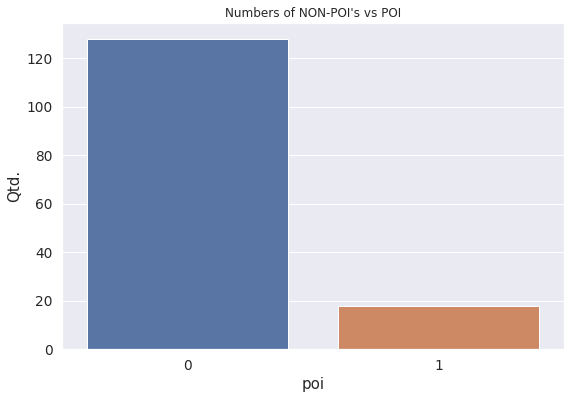

In [99]:
sns.set(font_scale=1.25)

fig, ax = plt.subplots()
fig.set_size_inches(9, 6)

sns.set(style="darkgrid")
ax = sns.countplot(x="poi", data=df).set_title("Numbers of NON-POI's vs POI")
plt.ylabel("Qtd.")
plt.savefig('./sample_data/poi_vs_non_poi')

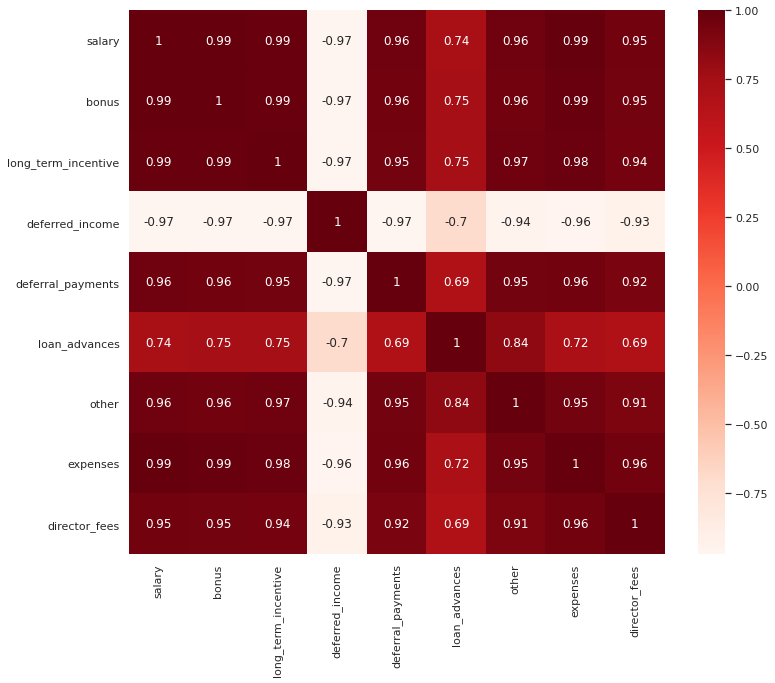

In [100]:
financial_features = ['salary', 'bonus', 'long_term_incentive', 'deferred_income', 'deferral_payments', \
                     'loan_advances', 'other', 'expenses', 'director_fees']
plt.figure(figsize=(12,10))
cor = df[financial_features].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('./sample_data/correlation_financial_feature_before_any_check')

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


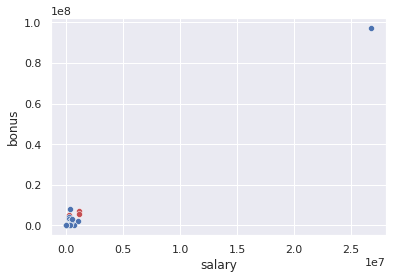

In [101]:
ax = sns.scatterplot(df[df['poi'] == True].salary, 
                     df[df['poi'] == True].bonus, color = 'r' )
ax = sns.scatterplot(df[df['poi'] == False].salary, 
                     df[df['poi'] == False].bonus, color = 'b' )

plt = ax.get_figure()
plt.savefig('./sample_data/scatter_for_bonus_salary_check_outliers')

In [107]:
# Checking the row with higher salary
outlier = df[df['salary'] == df['salary'].max()]
outlier
df_outliers = df_outliers.append(outlier)

In [151]:
df_outliers.head()

,poi,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
TOTAL,0.0,26704229.0,0.0,32083396.0,309886585.0,83925000.0,97343619.0,-7576788.0,-27992891.0,434509511.0,5235198.0,0.0,311764000.0,0.0,42667589.0,0.0,48521928.0,0.0,130322299.0,1398517.0
SKILLING JEFFREY K,1.0,1111258.0,3627.0,0.0,8682716.0,0.0,5600000.0,0.0,0.0,26093672.0,29336.0,88.0,19250000.0,108.0,22122.0,30.0,1920000.0,2042.0,6843672.0,0.0
THE TRAVEL AGENCY IN THE PARK,0.0,0.0,0.0,0.0,362096.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,362096.0,0.0,0.0,0.0,0.0,0.0
THE TRAVEL AGENCY IN THE PARK,0.0,0.0,0.0,0.0,362096.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,362096.0,0.0,0.0,0.0,0.0,0.0
THE TRAVEL AGENCY IN THE PARK,0.0,0.0,0.0,0.0,362096.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,362096.0,0.0,0.0,0.0,0.0,0.0


In [155]:
# We find a outlier that is actually the sum of all lines and needs to be remove.
#df.drop('TOTAL', axis = 0, inplace=True)

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


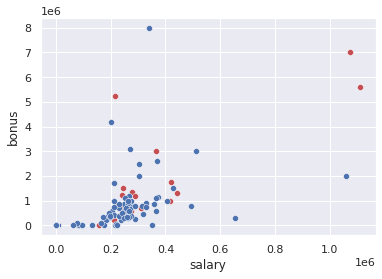

In [112]:
ax = sns.scatterplot(df[df['poi'] == True].salary, 
                     df[df['poi'] == True].bonus, color = 'r' )
ax = sns.scatterplot(df[df['poi'] == False].salary, 
                     df[df['poi'] == False].bonus, color = 'b' )

plt = ax.get_figure()
plt.savefig('./sample_data/scatter_for_bonus_salary_after_remove_outliers')

In [113]:
df.index.tolist()

['ALLEN PHILLIP K',
 'BADUM JAMES P',
 'BANNANTINE JAMES M',
 'BAXTER JOHN C',
 'BAY FRANKLIN R',
 'BAZELIDES PHILIP J',
 'BECK SALLY W',
 'BELDEN TIMOTHY N',
 'BELFER ROBERT',
 'BERBERIAN DAVID',
 'BERGSIEKER RICHARD P',
 'BHATNAGAR SANJAY',
 'BIBI PHILIPPE A',
 'BLACHMAN JEREMY M',
 'BLAKE JR. NORMAN P',
 'BOWEN JR RAYMOND M',
 'BROWN MICHAEL',
 'BUCHANAN HAROLD G',
 'BUTTS ROBERT H',
 'BUY RICHARD B',
 'CALGER CHRISTOPHER F',
 'CARTER REBECCA C',
 'CAUSEY RICHARD A',
 'CHAN RONNIE',
 'CHRISTODOULOU DIOMEDES',
 'CLINE KENNETH W',
 'COLWELL WESLEY',
 'CORDES WILLIAM R',
 'COX DAVID',
 'CUMBERLAND MICHAEL S',
 'DEFFNER JOSEPH M',
 'DELAINEY DAVID W',
 'DERRICK JR. JAMES V',
 'DETMERING TIMOTHY J',
 'DIETRICH JANET R',
 'DIMICHELE RICHARD G',
 'DODSON KEITH',
 'DONAHUE JR JEFFREY M',
 'DUNCAN JOHN H',
 'DURAN WILLIAM D',
 'ECHOLS JOHN B',
 'ELLIOTT STEVEN',
 'FALLON JAMES B',
 'FASTOW ANDREW S',
 'FITZGERALD JAY L',
 'FOWLER PEGGY',
 'FOY JOE',
 'FREVERT MARK A',
 'FUGH JOHN L',
 'GAHN 

In [119]:
# By looking the all the names, I find something strange, THE TRAVEL AGENCY IN THE PARK isn't a person. 
#And so needs to be removed.
df_outliers = df_outliers.append(df.loc['THE TRAVEL AGENCY IN THE PARK'])

In [120]:
df.drop(index='THE TRAVEL AGENCY IN THE PARK', inplace=True)

In [121]:
# Checking for users with most zero values.
outliers = df[(df['salary'] <= 0) 
                    & (df['bonus'] <= 0) 
                    & (df['restricted_stock'] <= 0) 
                    & (df['total_payments'] <= 0)
                    & (df['exercised_stock_options'] <= 0)
                    & (df['to_messages'] <= 0)]

In [40]:
outliers

,poi,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees
name,,,,,,,,,,,,,,,,,,,,
LOCKHART EUGENE E,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [122]:
df_outliers = df_outliers.append(df.loc['LOCKHART EUGENE E'])
df.drop(index='LOCKHART EUGENE E', inplace=True)

In [123]:
print ("Dataset SIZE : ", df.shape)

Dataset SIZE :  (143, 20)


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


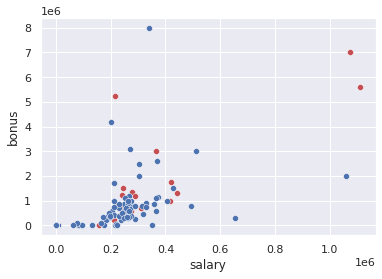

In [124]:
ax = sns.scatterplot(df[df['poi'] == True].salary, 
                     df[df['poi'] == True].bonus, color = 'r' )
ax = sns.scatterplot(df[df['poi'] == False].salary, 
                     df[df['poi'] == False].bonus, color = 'b' )

plt = ax.get_figure()
plt.savefig('./sample_data/scatter_for_bonus_salary_after_remove_outliers_2')

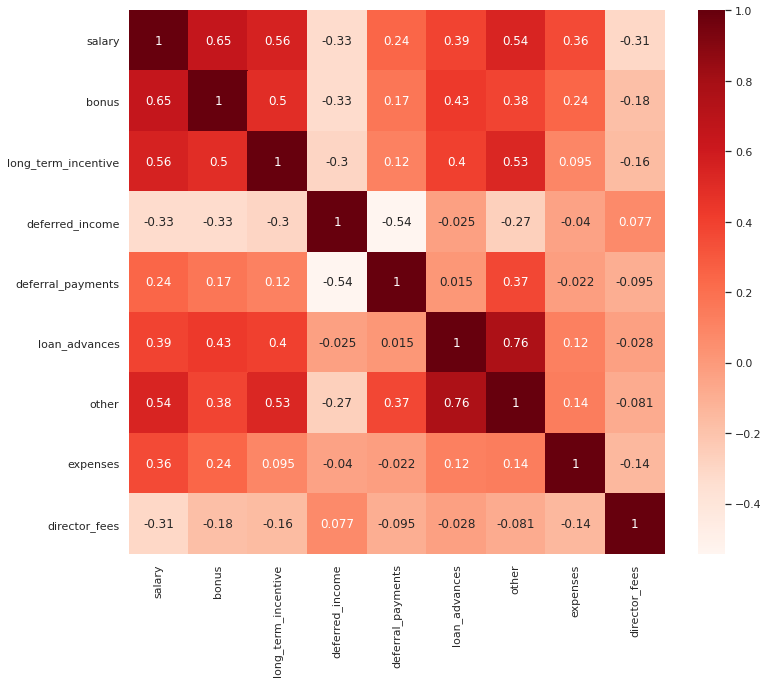

In [125]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,10))
cor = df[financial_features].corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.savefig('./sample_data/correlation_financial_feature_before_after_outliers_removed')

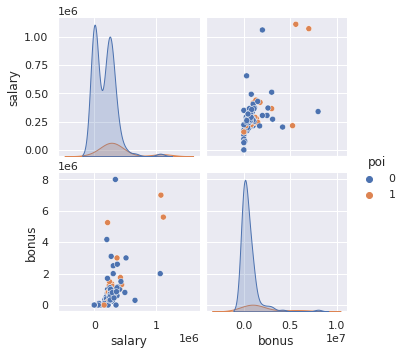

In [126]:
sns.pairplot(df,hue='poi',vars=['salary','bonus'], diag_kind='kde');
plt.savefig('./sample_data/pair_plot_salary_bonus')

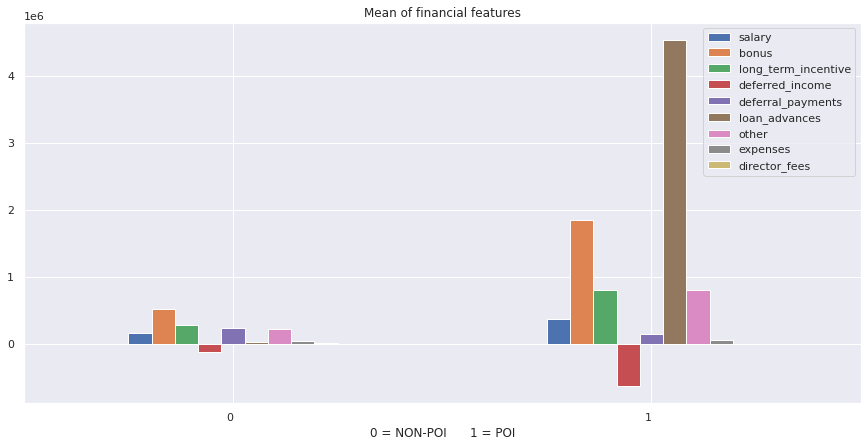

In [127]:
import matplotlib.pyplot as plt
df_finac_poi = df.groupby("poi")[financial_features].mean()
fig, ax = plt.subplots(figsize=(15,7))
df_finac_poi.plot.bar(ax=ax).set_title('Mean of financial features')
plt.xticks(rotation=0, ha="right")
plt.xlabel("0 = NON-POI      1 = POI")
plt.savefig('./sample_data/mean_of_financial_features')

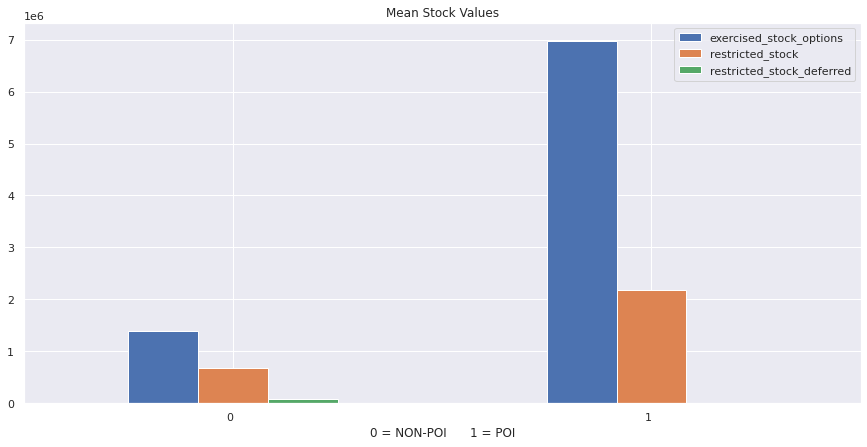

In [128]:
import matplotlib.pyplot as plt

features_stock = ['exercised_stock_options', 'restricted_stock', 'restricted_stock_deferred']

df_stock_poi = df.groupby("poi")[features_stock].mean()

fig, ax = plt.subplots(figsize=(15,7))
df_stock_poi.plot.bar(ax=ax).set_title('Mean Stock Values')
plt.xticks(rotation=0, ha="right")
plt.xlabel("0 = NON-POI      1 = POI")
plt.savefig('./sample_data/mean_stock_values')

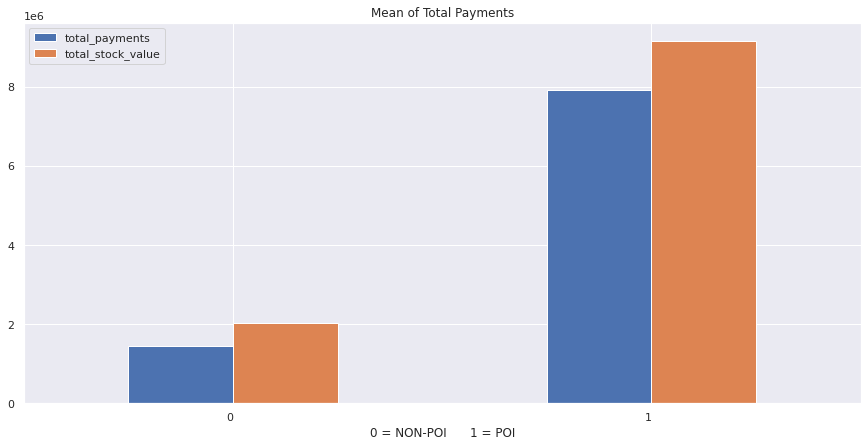

In [129]:
totals = ['total_payments','total_stock_value']
df_totals_poi = df.groupby("poi", as_index=True)[totals].mean()

fig, ax = plt.subplots(figsize=(15,7))
df_totals_poi.plot.bar(ax=ax).set_title('Mean of Total Payments')
plt.xticks(rotation=0, ha="right")
plt.xlabel("0 = NON-POI      1 = POI")
plt.savefig('./sample_data/mean_of_total_payments')

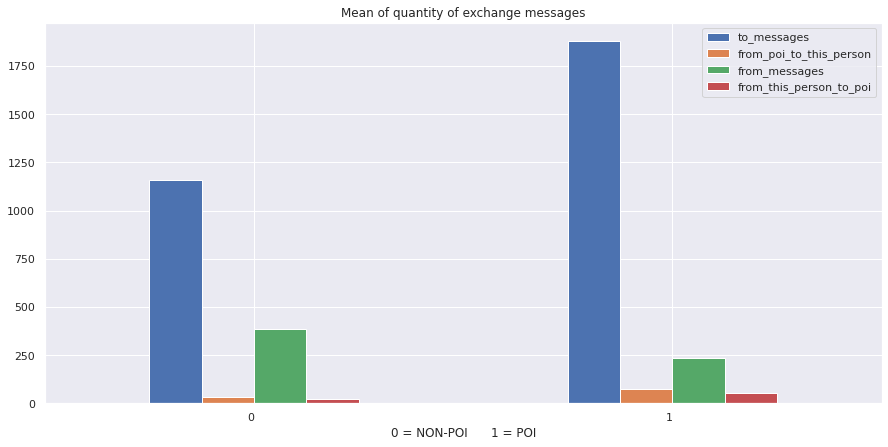

In [130]:
messages_features = ['to_messages', 'from_poi_to_this_person', 'from_messages','from_this_person_to_poi']

df_messages_poi = df.groupby("poi")[messages_features].mean()

fig, ax = plt.subplots(figsize=(15,7))
df_messages_poi.plot.bar(ax=ax).set_title('Mean of quantity of exchange messages')
plt.xticks(rotation=0, ha="right")
plt.xlabel("0 = NON-POI      1 = POI")
plt.savefig('./sample_data/mean_of_quantity_of_exchange_messages')

## Create new feature(s)

In [131]:
df['perc_from_poi'] = df.from_poi_to_this_person / df.to_messages
df['perc_to_poi'] = df.from_this_person_to_poi / df.from_messages
df['bonus_salary'] = df['bonus']/df['salary']
df.fillna(value=0, inplace=True)

In [132]:
df.perc_from_poi.describe()

count    143.000000
mean       0.022831
std        0.036495
min        0.000000
25%        0.000000
50%        0.005018
75%        0.030020
max        0.217341
Name: perc_from_poi, dtype: float64

In [133]:
df.perc_to_poi.describe()

count    143.000000
mean       0.110691
std        0.186359
min        0.000000
25%        0.000000
50%        0.000000
75%        0.199218
max        1.000000
Name: perc_to_poi, dtype: float64

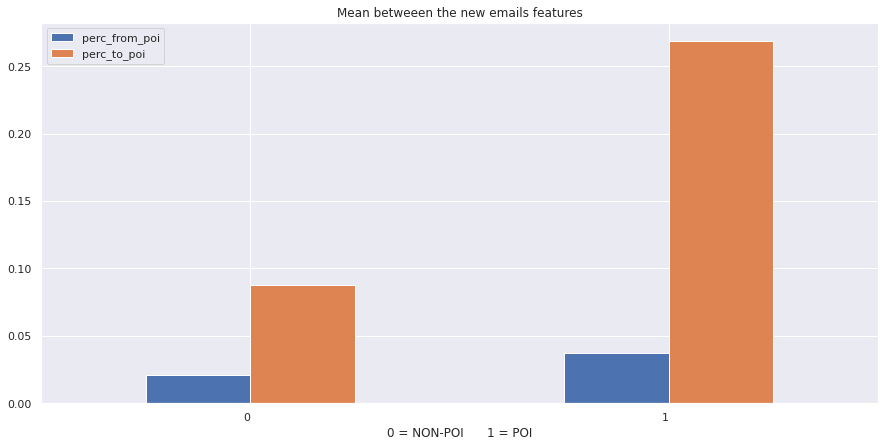

In [134]:
new_message_features = ['perc_from_poi', 'perc_to_poi']

df_messages_poi = df.groupby("poi")[new_message_features].mean()

fig, ax = plt.subplots(figsize=(15,7))
df_messages_poi.plot.bar(ax=ax).set_title('Mean betweeen the new emails features')
plt.xticks(rotation=0, ha="right")
plt.xlabel("0 = NON-POI      1 = POI")
plt.savefig('./sample_data/mean_betweeen_the_new_emails_features')

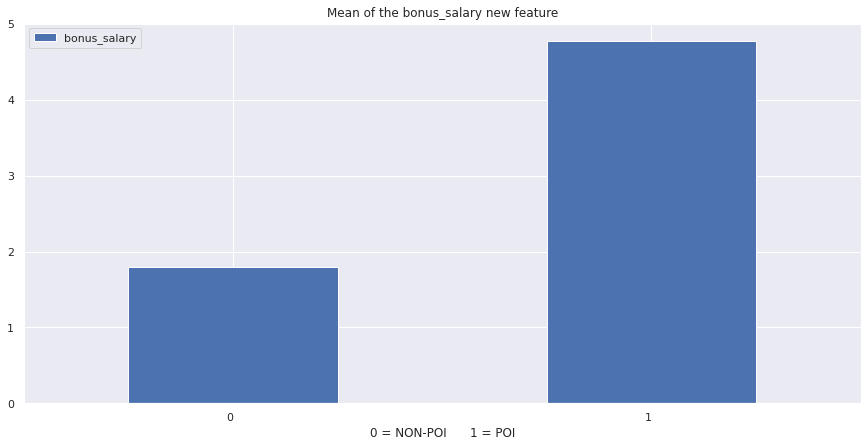

In [135]:
new_bonus_salary_features = ['bonus_salary']

df_messages_poi = df.groupby("poi")[new_bonus_salary_features].mean()

fig, ax = plt.subplots(figsize=(15,7))
df_messages_poi.plot.bar(ax=ax).set_title('Mean of the bonus_salary new feature')
plt.xticks(rotation=0, ha="right")
plt.xlabel("0 = NON-POI      1 = POI")
plt.savefig('./sample_data/mean_of_the_bonus_salary_new_feature')

## Training Set & Test Set

In [136]:
df.head()

,poi,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,perc_from_poi,perc_to_poi,bonus_salary
ALLEN PHILLIP K,0,201955.0,2902.0,2869717.0,4484442.0,0.0,4175000.0,-126027.0,-3081055.0,1729541.0,13868.0,47.0,1729541.0,2195.0,152.0,65.0,304805.0,1407.0,126027.0,0.0,0.016196,0.029613,20.672922
BADUM JAMES P,0,0.0,0.0,178980.0,182466.0,0.0,0.0,0.0,0.0,257817.0,3486.0,0.0,257817.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
BANNANTINE JAMES M,0,477.0,566.0,0.0,916197.0,0.0,0.0,-560222.0,-5104.0,5243487.0,56301.0,39.0,4046157.0,29.0,864523.0,0.0,0.0,465.0,1757552.0,0.0,0.068905,0.000000,0.000000
BAXTER JOHN C,0,267102.0,0.0,1295738.0,5634343.0,0.0,1200000.0,0.0,-1386055.0,10623258.0,11200.0,0.0,6680544.0,0.0,2660303.0,0.0,1586055.0,0.0,3942714.0,0.0,0.000000,0.000000,4.492666
BAY FRANKLIN R,0,239671.0,0.0,260455.0,827696.0,0.0,400000.0,-82782.0,-201641.0,63014.0,129142.0,0.0,0.0,0.0,69.0,0.0,0.0,0.0,145796.0,0.0,0.000000,0.000000,1.668955


In [137]:
# select columns other than 'poi'
cols = [col for col in df.columns if col not in ['poi']]
# dropping the 'Opportunity Number'and 'Opportunity Result' columns
data = df[cols]
#assigning the Poi column as target
target = df['poi']
data.head(n=2)

,salary,to_messages,deferral_payments,total_payments,loan_advances,bonus,restricted_stock_deferred,deferred_income,total_stock_value,expenses,from_poi_to_this_person,exercised_stock_options,from_messages,other,from_this_person_to_poi,long_term_incentive,shared_receipt_with_poi,restricted_stock,director_fees,perc_from_poi,perc_to_poi,bonus_salary
ALLEN PHILLIP K,201955.0,2902.0,2869717.0,4484442.0,0.0,4175000.0,-126027.0,-3081055.0,1729541.0,13868.0,47.0,1729541.0,2195.0,152.0,65.0,304805.0,1407.0,126027.0,0.0,0.016196,0.029613,20.672922
BADUM JAMES P,0.0,0.0,178980.0,182466.0,0.0,0.0,0.0,0.0,257817.0,3486.0,0.0,257817.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [138]:
cols

['salary',
 'to_messages',
 'deferral_payments',
 'total_payments',
 'loan_advances',
 'bonus',
 'restricted_stock_deferred',
 'deferred_income',
 'total_stock_value',
 'expenses',
 'from_poi_to_this_person',
 'exercised_stock_options',
 'from_messages',
 'other',
 'from_this_person_to_poi',
 'long_term_incentive',
 'shared_receipt_with_poi',
 'restricted_stock',
 'director_fees',
 'perc_from_poi',
 'perc_to_poi',
 'bonus_salary']

In [139]:
target

ALLEN PHILLIP K          0
BADUM JAMES P            0
BANNANTINE JAMES M       0
BAXTER JOHN C            0
BAY FRANKLIN R           0
                        ..
WINOKUR JR. HERBERT S    0
WODRASKA JOHN            0
WROBEL BRUCE             0
YEAGER F SCOTT           1
YEAP SOON                0
Name: poi, Length: 143, dtype: int64

In [140]:
y = df.poi
X = df.drop('poi', axis=1)

In [141]:
#split data set into train and test 
X_train, X_test, y_train, y_test = train_test_split(data, target,test_size=0.3, random_state=42)

In [142]:
X_train_scaled = preprocessing.scale(X_train)
print (X_train_scaled)

[[-0.89821457 -0.54333006 -0.27853333 ... -0.60484845 -0.56918966
  -0.61964173]
 [ 0.55705872 -0.49761445 -0.27853333 ... -0.60484845  0.07000527
   0.20599391]
 [-0.05435072 -0.54333006 -0.27853333 ... -0.60484845 -0.56918966
  -0.2636822 ]
 ...
 [-0.89821457 -0.54333006 -0.27853333 ... -0.60484845 -0.56918966
  -0.61964173]
 [ 0.79552337 -0.18163889 -0.27853333 ...  0.59901737 -0.38734972
  -0.08759713]
 [ 0.31438507 -0.54333006 -0.27853333 ... -0.60484845 -0.56918966
   0.61894256]]


## Naive-Bayes

In [143]:
clf = GaussianNB()
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)
score = clf.score(X_test, y_test)

In [69]:
print (score)

0.8837209302325582


In [144]:
#evaluate scores
print ("GaussianNB accuracy score : ",accuracy_score(y_test, y_pred))
print ("GaussianNB precision score : ",precision_score(y_test, y_pred))
print ("GaussianNB recall score : ",recall_score(y_test, y_pred))
print ("GaussianNB f1 score : ",f1_score(y_test, y_pred))

GaussianNB accuracy score :  0.8837209302325582
GaussianNB precision score :  0.5
GaussianNB recall score :  0.4
GaussianNB f1 score :  0.4444444444444445


In [145]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.92      0.95      0.94        38
           1       0.50      0.40      0.44         5

    accuracy                           0.88        43
   macro avg       0.71      0.67      0.69        43
weighted avg       0.87      0.88      0.88        43



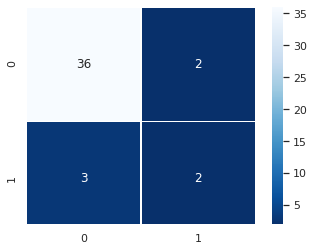

In [146]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
ax=plt.gca()
ax.set_ylim(len(confusion_matrix)-0.1, 0.0)
plt.savefig('./sample_data/confusion_matrix_GaussianNB')

## K-Neighbors Classifier

In [147]:
clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
y_pred = clf.fit(X_train, y_train).predict(X_test)

In [148]:
# evaluate scores
print ("KNeighbors accuracy score : ",accuracy_score(y_test, y_pred))
print ("KNeighbors precision score : ",precision_score(y_test, y_pred))
print ("KNeighbors recall score : ",recall_score(y_test, y_pred))
print ("KNeighbors f1 score : ",f1_score(y_test, y_pred))

KNeighbors accuracy score :  0.9069767441860465
KNeighbors precision score :  0.6666666666666666
KNeighbors recall score :  0.4
KNeighbors f1 score :  0.5


In [149]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.93      0.97      0.95        38
           1       0.67      0.40      0.50         5

    accuracy                           0.91        43
   macro avg       0.80      0.69      0.72        43
weighted avg       0.89      0.91      0.90        43



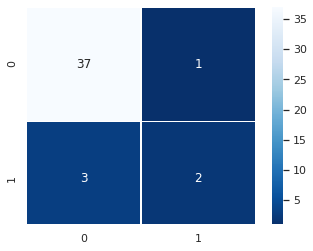

In [150]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_matrix, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
ax=plt.gca()
ax.set_ylim(len(confusion_matrix)-0.1, 0.0)
plt.savefig('./sample_data/confusion_matrix_KNeighbors')